In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ananthu017/emotion-detection-fer")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1


In [11]:
import os

print(f"Contents of the downloaded dataset directory ({path}):")
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

Contents of the downloaded dataset directory (C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1):
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im0.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im1.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im10.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im100.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im101.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im102.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im103.png
C:\Users\jobet\.cache\kagglehub\datasets\ananthu017\emotion-detection-fer\versions\1\test\angry\im104.png
C:\Users\jobet\.cache\ka

In [12]:
import os

train_counts = {}
test_counts = {}

for root, dirs, files in os.walk(path):
    parts = root.split(os.sep)
    if len(parts) >= 2:
        if 'train' in parts:
            split_index = parts.index('train')
            current_split = 'train'
        elif 'test' in parts:
            split_index = parts.index('test')
            current_split = 'test'
        else:
            continue

        if len(parts) > split_index + 1:
            emotion_class = parts[split_index + 1]
            
            if current_split == 'train':
                train_counts[emotion_class] = train_counts.get(emotion_class, 0) + len(files)
            elif current_split == 'test':
                test_counts[emotion_class] = test_counts.get(emotion_class, 0) + len(files)


print("\nDistribution of images in the training set:")
for emotion, count in train_counts.items():
    print(f"  {emotion}: {count} images")
print(f"Total training images: {sum(train_counts.values())}")

print("\nDistribution of images in the test set:")
for emotion, count in test_counts.items():
    print(f"  {emotion}: {count} images")
print(f"Total test images: {sum(test_counts.values())}")


Distribution of images in the training set:
  angry: 3995 images
  disgusted: 436 images
  fearful: 4097 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images
  surprised: 3171 images
Total training images: 28709

Distribution of images in the test set:
  angry: 958 images
  disgusted: 111 images
  fearful: 1024 images
  happy: 1774 images
  neutral: 1233 images
  sad: 1247 images
  surprised: 831 images
Total test images: 7178


In [13]:
import os

train_counts = {}
test_counts = {}
validation_counts = {}

for root, dirs, files in os.walk(path):
    parts = root.split(os.sep)
    current_split = None
    split_index = -1

    if 'train' in parts:
        split_index = parts.index('train')
        current_split = 'train'
    elif 'test' in parts:
        split_index = parts.index('test')
        current_split = 'test'
    elif 'validation' in parts:
        split_index = parts.index('validation')
        current_split = 'validation'

    if current_split and len(parts) > split_index + 1:
        emotion_class = parts[split_index + 1]

        if current_split == 'train':
            train_counts[emotion_class] = train_counts.get(emotion_class, 0) + len(files)
        elif current_split == 'test':
            test_counts[emotion_class] = test_counts.get(emotion_class, 0) + len(files)
        elif current_split == 'validation':
            validation_counts[emotion_class] = validation_counts.get(emotion_class, 0) + len(files)

print("\nDistribution of images in the training set:")
if train_counts:
    for emotion, count in train_counts.items():
        print(f"  {emotion}: {count} images")
    print(f"Total training images: {sum(train_counts.values())}")
else:
    print("  No training set found.")

print("\nDistribution of images in the validation set:")
if validation_counts:
    for emotion, count in validation_counts.items():
        print(f"  {emotion}: {count} images")
    print(f"Total validation images: {sum(validation_counts.values())}")
else:
    print("  No validation set found.")

print("\nDistribution of images in the test set:")
if test_counts:
    for emotion, count in test_counts.items():
        print(f"  {emotion}: {count} images")
    print(f"Total test images: {sum(test_counts.values())}")
else:
    print("  No test set found.")


Distribution of images in the training set:
  angry: 3995 images
  disgusted: 436 images
  fearful: 4097 images
  happy: 7215 images
  neutral: 4965 images
  sad: 4830 images
  surprised: 3171 images
Total training images: 28709

Distribution of images in the validation set:
  No validation set found.

Distribution of images in the test set:
  angry: 958 images
  disgusted: 111 images
  fearful: 1024 images
  happy: 1774 images
  neutral: 1233 images
  sad: 1247 images
  surprised: 831 images
Total test images: 7178


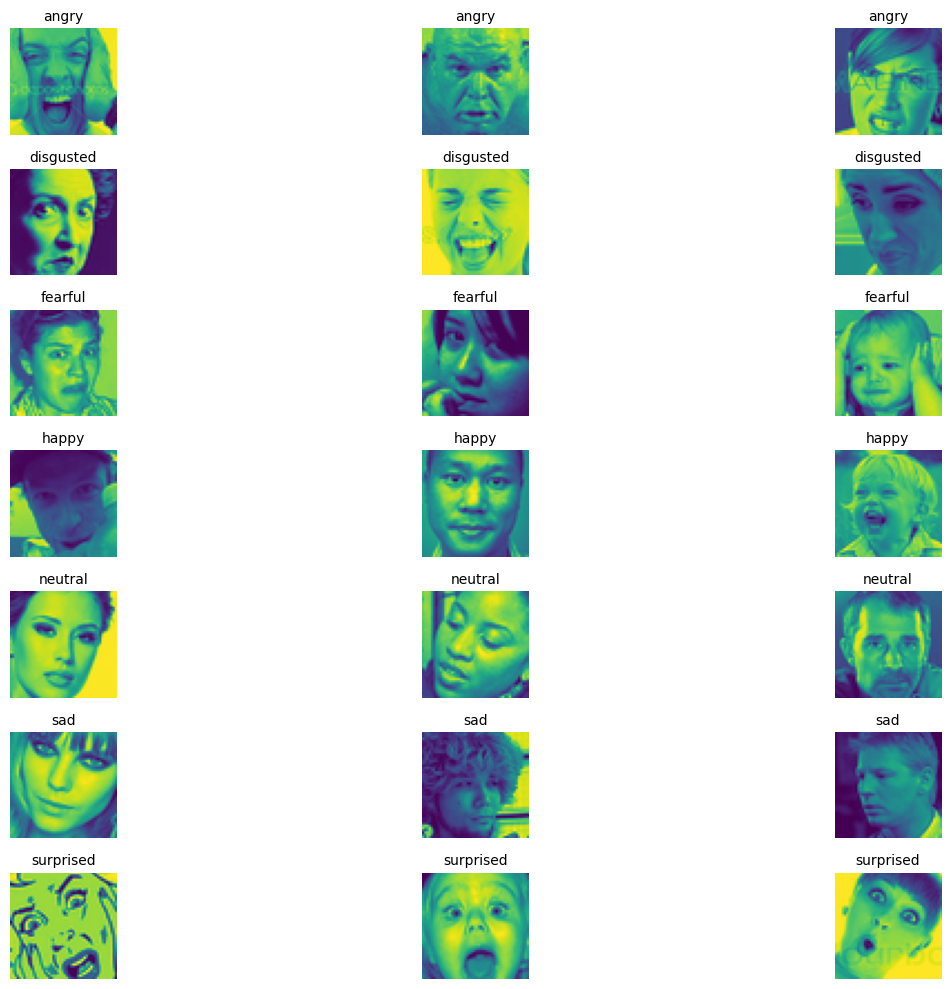

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

emotion_classes = list(train_counts.keys())

plt.figure(figsize=(15, 10))

num_samples = 3

for i, emotion_class in enumerate(emotion_classes):
    emotion_dir = os.path.join(path, 'train', emotion_class)

    image_files = [f for f in os.listdir(emotion_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    import random
    random.shuffle(image_files)
    selected_samples = image_files[:num_samples]

    for j, sample_file in enumerate(selected_samples):
        plt.subplot(len(emotion_classes), num_samples, i * num_samples + j + 1)

        image_path = os.path.join(emotion_dir, sample_file)

        img = Image.open(image_path)
        plt.imshow(img)

        plt.title(f"{emotion_class}", fontsize=10)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [15]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

IMG_SIZE = 48
BATCH_SIZE = 64

train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.ImageFolder(os.path.join(path, 'train'), transform=train_transforms)
test_dataset = datasets.ImageFolder(os.path.join(path, 'test'), transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"Training dataset size: {len(train_dataset)} images")
print(f"Test dataset size: {len(test_dataset)} images")
print(f"Number of batches in training loader: {len(train_loader)}")
print(f"Number of batches in test loader: {len(test_loader)}")


Training dataset size: 28709 images
Test dataset size: 7178 images
Number of batches in training loader: 449
Number of batches in test loader: 113


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

num_classes = len(train_dataset.classes)
print(f"Number of emotion classes: {num_classes}")

class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(128 * (IMG_SIZE // 8) * (IMG_SIZE // 8), 256) 
        self.bn4 = nn.BatchNorm1d(256)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.dropout1(self.pool1(F.relu(self.bn1(self.conv1(x)))))
        x = self.dropout2(self.pool2(F.relu(self.bn2(self.conv2(x)))))
        x = self.dropout3(self.pool3(F.relu(self.bn3(self.conv3(x)))))

        x = x.view(-1, self.fc1.in_features)

        x = self.dropout4(F.relu(self.bn4(self.fc1(x))))
        x = self.fc2(x)
        return x

print("EmotionCNN model defined successfully.")

Number of emotion classes: 7
EmotionCNN model defined successfully.


In [17]:
import torch.optim as optim

model = EmotionCNN(num_classes=num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print(f"Model instantiated and moved to {device}.")
print("Loss function: CrossEntropyLoss")
print("Optimizer: Adam with learning rate 0.001")

Model instantiated and moved to cpu.
Loss function: CrossEntropyLoss
Optimizer: Adam with learning rate 0.001


In [18]:
import torch

class_names = train_dataset.classes

class_counts_list = [train_counts[class_name] for class_name in class_names]

total_samples = sum(train_counts.values())

class_weights_list = [total_samples / (num_classes * count) for count in class_counts_list]

class_weights = torch.tensor(class_weights_list, dtype=torch.float32)

print("Calculated Class Weights:")
for i, class_name in enumerate(class_names):
    print(f"  {class_name}: {class_weights[i]:.4f}")
print(f"Class Weights Tensor: {class_weights}")

Calculated Class Weights:
  angry: 1.0266
  disgusted: 9.4066
  fearful: 1.0010
  happy: 0.5684
  neutral: 0.8260
  sad: 0.8491
  surprised: 1.2934
Class Weights Tensor: tensor([1.0266, 9.4066, 1.0010, 0.5684, 0.8260, 0.8491, 1.2934])


In [19]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

print(f"Loss function updated with class weights: {criterion}")

Loss function updated with class weights: CrossEntropyLoss()


In [21]:
EPOCHS = 10

def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad() 
        outputs = model(inputs)
        loss = criterion(outputs, labels) 
        loss.backward() 
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / total_samples
    epoch_accuracy = correct_predictions / total_samples
    return epoch_loss, epoch_accuracy

def evaluate_model(model, data_loader, criterion, device):
    model.eval() 
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad(): 
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_samples += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

    epoch_loss = running_loss / total_samples
    epoch_accuracy = correct_predictions / total_samples
    return epoch_loss, epoch_accuracy


print(f"Starting training for {EPOCHS} epochs...")
for epoch in range(EPOCHS):
    train_loss, train_accuracy = train_model(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = evaluate_model(model, test_loader, criterion, device)

    print(f'Epoch {epoch+1}/{EPOCHS}: ')
    print(f'  Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}')
    print(f'  Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

print("Training complete.")

Starting training for 10 epochs...
Epoch 1/10: 
  Train Loss: 1.7769, Train Accuracy: 0.3123
  Test Loss: 1.5054, Test Accuracy: 0.4366
Epoch 2/10: 
  Train Loss: 1.5846, Train Accuracy: 0.3909
  Test Loss: 1.4018, Test Accuracy: 0.4657
Epoch 3/10: 
  Train Loss: 1.5118, Train Accuracy: 0.4215
  Test Loss: 1.3513, Test Accuracy: 0.4813
Epoch 4/10: 
  Train Loss: 1.4531, Train Accuracy: 0.4433
  Test Loss: 1.3244, Test Accuracy: 0.4926
Epoch 5/10: 
  Train Loss: 1.4174, Train Accuracy: 0.4574
  Test Loss: 1.3258, Test Accuracy: 0.4911
Epoch 6/10: 
  Train Loss: 1.3916, Train Accuracy: 0.4689
  Test Loss: 1.2623, Test Accuracy: 0.5224
Epoch 7/10: 
  Train Loss: 1.3691, Train Accuracy: 0.4785
  Test Loss: 1.2436, Test Accuracy: 0.5227
Epoch 8/10: 
  Train Loss: 1.3493, Train Accuracy: 0.4831
  Test Loss: 1.2579, Test Accuracy: 0.5192
Epoch 9/10: 
  Train Loss: 1.3184, Train Accuracy: 0.4949
  Test Loss: 1.2246, Test Accuracy: 0.5287
Epoch 10/10: 
  Train Loss: 1.3015, Train Accuracy: 0.49

In [22]:
print(f"Starting re-training with class weights for {EPOCHS} epochs...")

model_weighted = EmotionCNN(num_classes=num_classes)
model_weighted.to(device)

optimizer_weighted = optim.Adam(model_weighted.parameters(), lr=0.001)

weighted_train_losses = []
weighted_train_accuracies = []
weighted_test_losses = []
weighted_test_accuracies = []

for epoch in range(EPOCHS):
    train_loss_w, train_accuracy_w = train_model(model_weighted, train_loader, criterion, optimizer_weighted, device)
    test_loss_w, test_accuracy_w = evaluate_model(model_weighted, test_loader, criterion, device)

    weighted_train_losses.append(train_loss_w)
    weighted_train_accuracies.append(train_accuracy_w)
    weighted_test_losses.append(test_loss_w)
    weighted_test_accuracies.append(test_accuracy_w)

    print(f'Epoch {epoch+1}/{EPOCHS} (Weighted): ')
    print(f'  Train Loss: {train_loss_w:.4f}, Train Accuracy: {train_accuracy_w:.4f}')
    print(f'  Test Loss: {test_loss_w:.4f}, Test Accuracy: {test_accuracy_w:.4f}')

print("Re-training with class weights complete.")

print("\n--- Summary of Model Performance with Class Weights ---")
print(f"Initial Test Accuracy (without weights): {test_accuracy:.4f}")
print(f"Final Test Accuracy (with weights): {weighted_test_accuracies[-1]:.4f}")

print("\nInitial Test Loss (without weights): {test_loss:.4f}")
print(f"Final Test Loss (with weights): {weighted_test_losses[-1]:.4f}")

Starting re-training with class weights for 10 epochs...
Epoch 1/10 (Weighted): 
  Train Loss: 1.8055, Train Accuracy: 0.2849
  Test Loss: 1.5292, Test Accuracy: 0.4177
Epoch 2/10 (Weighted): 
  Train Loss: 1.6164, Train Accuracy: 0.3794
  Test Loss: 1.4121, Test Accuracy: 0.4654
Epoch 3/10 (Weighted): 
  Train Loss: 1.5207, Train Accuracy: 0.4172
  Test Loss: 1.4102, Test Accuracy: 0.4609
Epoch 4/10 (Weighted): 
  Train Loss: 1.4739, Train Accuracy: 0.4388
  Test Loss: 1.3019, Test Accuracy: 0.5075
Epoch 5/10 (Weighted): 
  Train Loss: 1.4304, Train Accuracy: 0.4478
  Test Loss: 1.2653, Test Accuracy: 0.5171
Epoch 6/10 (Weighted): 
  Train Loss: 1.4006, Train Accuracy: 0.4637
  Test Loss: 1.2691, Test Accuracy: 0.5127
Epoch 7/10 (Weighted): 
  Train Loss: 1.3693, Train Accuracy: 0.4757
  Test Loss: 1.2944, Test Accuracy: 0.5028
Epoch 8/10 (Weighted): 
  Train Loss: 1.3560, Train Accuracy: 0.4834
  Test Loss: 1.2901, Test Accuracy: 0.5056
Epoch 9/10 (Weighted): 
  Train Loss: 1.3223, T